# IMPORTS



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import plotly.express as px
import random
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#Data Exploration


In [ ]:
df = pd.read_csv("/content/new_devis.csv", encoding='latin-1')

In [ ]:
df.head()

,ProjectID,ClientID,StartDate,EndDate,Duration,Category,Size,Cost
0,4136,169,03/12/2022,01/03/2023,88,AI,Medium,9980
1,2351,4105,18/08/2021,15/09/2021,28,E-commerce,Small,4600
2,3742,640,14/11/2021,22/03/2022,128,AI,Big,18910
3,4320,1421,29/11/2020,05/04/2021,127,UI/UX,Big,13420
4,3149,3411,25/03/2021,08/09/2021,167,Mobile,Big,76790


In [ ]:
df.shape

(5000, 8)

In [ ]:
df.describe()

,ProjectID,ClientID,Duration,Cost
count,5000.000000,5000.000000,5000.0000,5000.000000
mean,2536.436400,2544.470000,78.6326,21959.608000
std,1437.487072,1436.708381,55.9996,28912.066671
min,2.000000,1.000000,15.0000,500.000000
25%,1317.000000,1311.250000,26.0000,3940.000000
50%,2530.500000,2587.500000,62.0000,8290.000000
75%,3793.250000,3795.000000,136.0000,26307.500000
max,5000.000000,5000.000000,180.0000,99960.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProjectID  5000 non-null   int64 
 1   ClientID   5000 non-null   int64 
 2   StartDate  5000 non-null   object
 3   EndDate    5000 non-null   object
 4   Duration   5000 non-null   int64 
 5   Category   5000 non-null   object
 6   Size       5000 non-null   object
 7   Cost       5000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


In [ ]:
df.EndDate.head()

0    01/03/2023
1    15/09/2021
2    22/03/2022
3    05/04/2021
4    08/09/2021
Name: EndDate, dtype: object

 **We should convert date columns to datetime format**

In [ ]:
df['StartDate'] = pd.to_datetime(df['StartDate'], format='%d/%m/%Y', errors='coerce')
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%d/%m/%Y', errors='coerce')

In [ ]:
df['Cost'] = df['Cost'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ProjectID  5000 non-null   int64         
 1   ClientID   5000 non-null   int64         
 2   StartDate  5000 non-null   datetime64[ns]
 3   EndDate    5000 non-null   datetime64[ns]
 4   Duration   5000 non-null   int64         
 5   Category   5000 non-null   object        
 6   Size       5000 non-null   object        
 7   Cost       5000 non-null   int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 312.6+ KB


In [ ]:
(df['EndDate']>df['StartDate']).sum()

5000

In [ ]:
df.isnull().sum()

ProjectID    0
ClientID     0
StartDate    0
EndDate      0
Duration     0
Category     0
Size         0
Cost         0
dtype: int64

In [ ]:
print(df['Category'].unique())
print(df['Size'].unique())

['AI' 'E-commerce' 'UI/UX' 'Mobile' 'IoT' 'Web']
['Medium' 'Small' 'Big']


In [ ]:
print(df['Category'].value_counts())
print(df['Size'].value_counts())

IoT           877
AI            861
Web           844
Mobile        829
E-commerce    822
UI/UX         767
Name: Category, dtype: int64
Big       1710
Small     1659
Medium    1631
Name: Size, dtype: int64


* The 'Category' column represents nominal data, where the values ['Mobile', 'AI', 'Web', 'IoT'] are distinct Category without any inherent order or hierarchy.

* The 'Size' column represents ordinal data, where the values ['Small', 'Big', 'Medium'] have a natural order indicating different levels of size or complexity, with 'Small' < 'Medium' < 'Big'.

# Data Visualisation

We need to first delete the columns that contain the IDs of the project and the client as they won't be relevant in our Cost prediction.

In [ ]:
df = df.iloc[:, 2:]

**Data distributions with histograms**

  We need to extract only the columns with numerical data

In [ ]:
num_cols = [col for col in df.columns if df[col].dtype != 'object' and df[col].dtype != 'datetime64[ns]']

In [ ]:
fig = px.histogram(df, x='Cost')
fig.update_traces(marker=dict(color='rgb(0, 128, 128)', line=dict(color='rgb(0, 0, 0)', width=1)))

fig.update_layout(
    title='Distribution of Cost',
    xaxis=dict(title='Cost'),
    yaxis=dict(title='Density'),
    hovermode='closest',
    hoverlabel=dict(bgcolor='white', font_size=12)
)

fig.show()

In [ ]:
num_projects = ((df['Cost'] >= 0) & (df['Cost'] <= 10000)).sum()
print("Number of projects with Cost between 0 and 10000:", num_projects)

num_projects = (df['Cost'] >= 10000) .sum()
print("Number of projects with Cost greater than 10000:", num_projects)

Number of projects with Cost between 0 and 10000: 3290
Number of projects with Cost greater than 10000: 1712


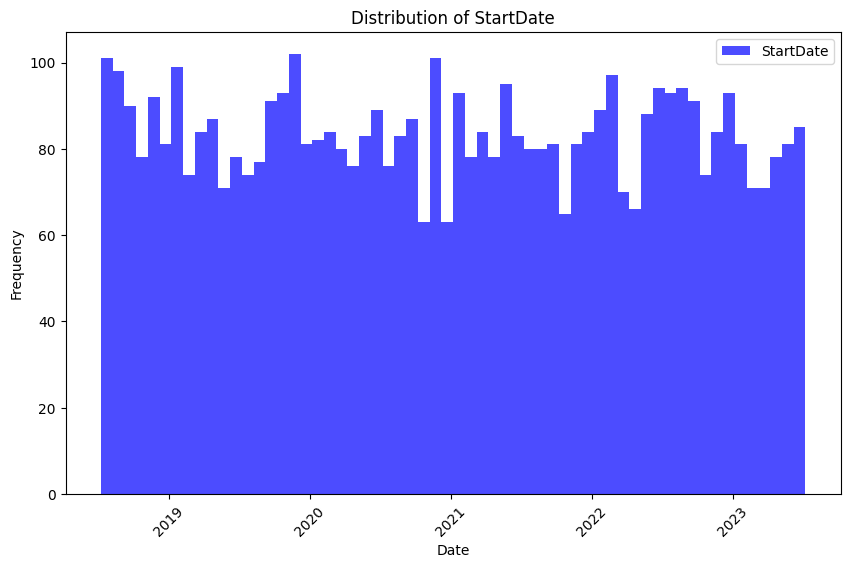

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['StartDate'], bins=60, label='StartDate', alpha=0.7, color='blue')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of StartDate')
plt.xticks(rotation=45)
plt.legend()
plt.show()

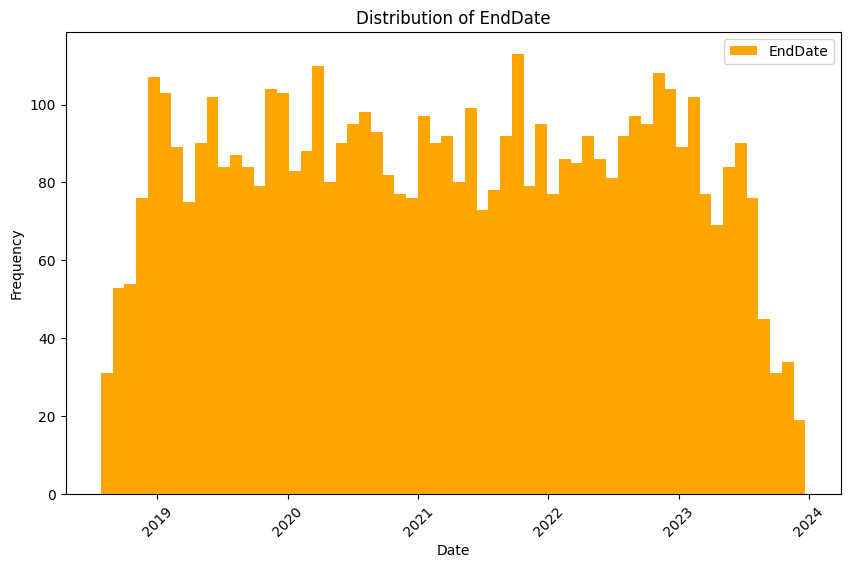

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['EndDate'], bins=60, label='EndDate', color='orange')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of EndDate')
plt.xticks(rotation=45)
plt.legend()
plt.show()

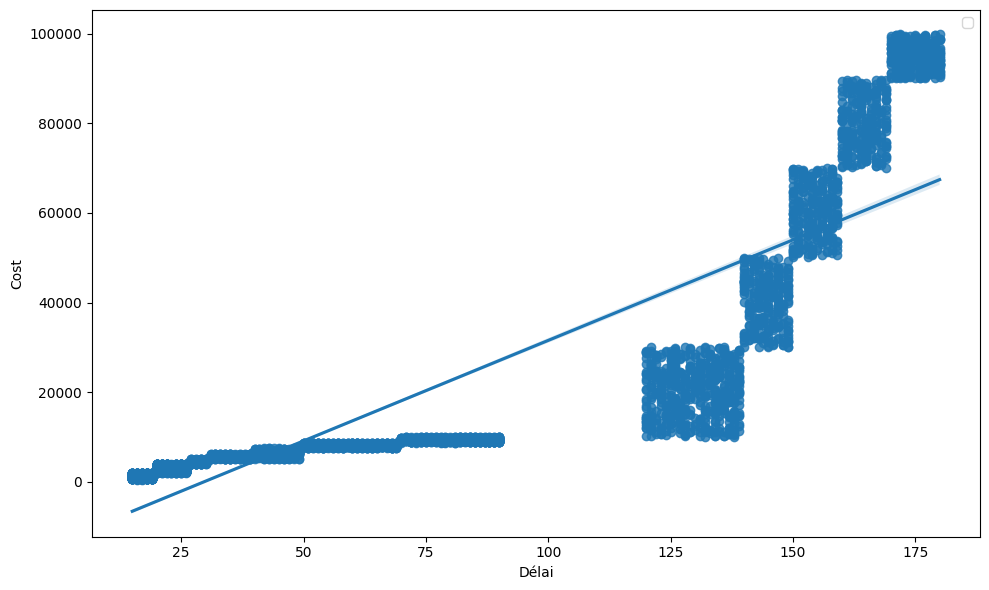

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['Duration'], y=df['Cost'], data=df)
plt.ylabel('Cost')
plt.xlabel('Délai')
plt.legend()
plt.tight_layout()
plt.show()

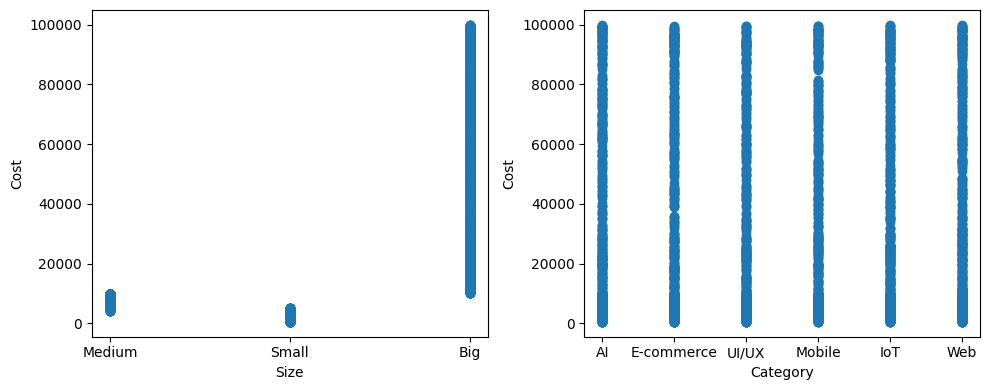

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Scatter plot 1
axes[0].scatter(df['Size'], df['Cost'])
axes[0].set_xlabel('Size')
axes[0].set_ylabel('Cost')

# Scatter plot 2
axes[1].scatter(df['Category'], df['Cost'])
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Cost')

plt.tight_layout()
plt.show()

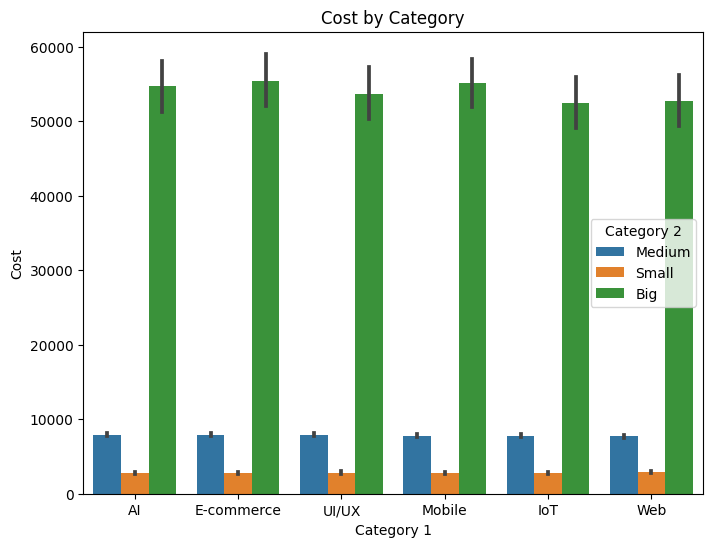

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Cost', hue='Size', data=df)
plt.xlabel('Category 1')
plt.ylabel('Cost')
plt.title('Cost by Category')
plt.legend(title='Category 2')
plt.show()

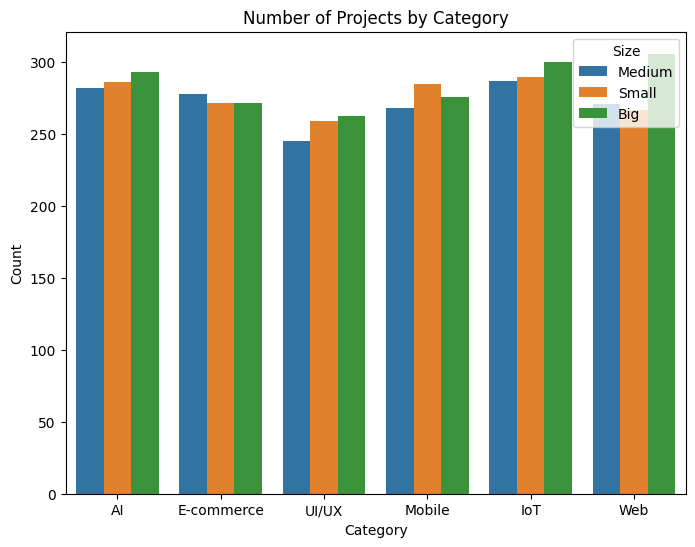

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', hue='Size', data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Projects by Category')
plt.legend(title='Size')
plt.show()

In [ ]:

fig = px.box(df,x='Size', y='Cost')
fig.update_layout(width=1000, height=600)
fig.show()

#checking for outliers

In [ ]:
fig = px.box(df, y="Cost")
fig.update_layout(width=1200, height=600)
fig.show()

In [ ]:
fig = px.box(df, y="Duration")
fig.update_layout(width=800, height=400)
fig.show()

**Encoding categorical variables**

In [ ]:
le = LabelEncoder()
df["Size"] = le.fit_transform(df["Size"])
df["Category"] = le.fit_transform(df["Category"])

In [ ]:
df.head()

,StartDate,EndDate,Duration,Category,Size,Cost
0,2022-12-03,2023-03-01,88,0,1,9980
1,2021-08-18,2021-09-15,28,1,2,4600
2,2021-11-14,2022-03-22,128,0,0,18910
3,2020-11-29,2021-04-05,127,4,0,13420
4,2021-03-25,2021-09-08,167,3,0,76790


**Now we need to handle the dates**
**We are going t extract the years and months into their own columns**

In [ ]:
newData = df.copy()

In [ ]:
newData["StartDate_year"] = newData["StartDate"].dt.year
newData["StartDate_month"] = newData["StartDate"].dt.month

newData["EndDate_year"] = newData["EndDate"].dt.year
newData["EndDate_month"] = newData["EndDate"].dt.month


In [ ]:
newData = newData.drop('StartDate', axis=1)
newData = newData.drop('EndDate', axis=1)

In [ ]:
#newData = newData[newData['Duration'] > 88]

In [ ]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Duration         5000 non-null   int64
 1   Category         5000 non-null   int64
 2   Size             5000 non-null   int64
 3   Cost             5000 non-null   int64
 4   StartDate_year   5000 non-null   int64
 5   StartDate_month  5000 non-null   int64
 6   EndDate_year     5000 non-null   int64
 7   EndDate_month    5000 non-null   int64
dtypes: int64(8)
memory usage: 312.6 KB


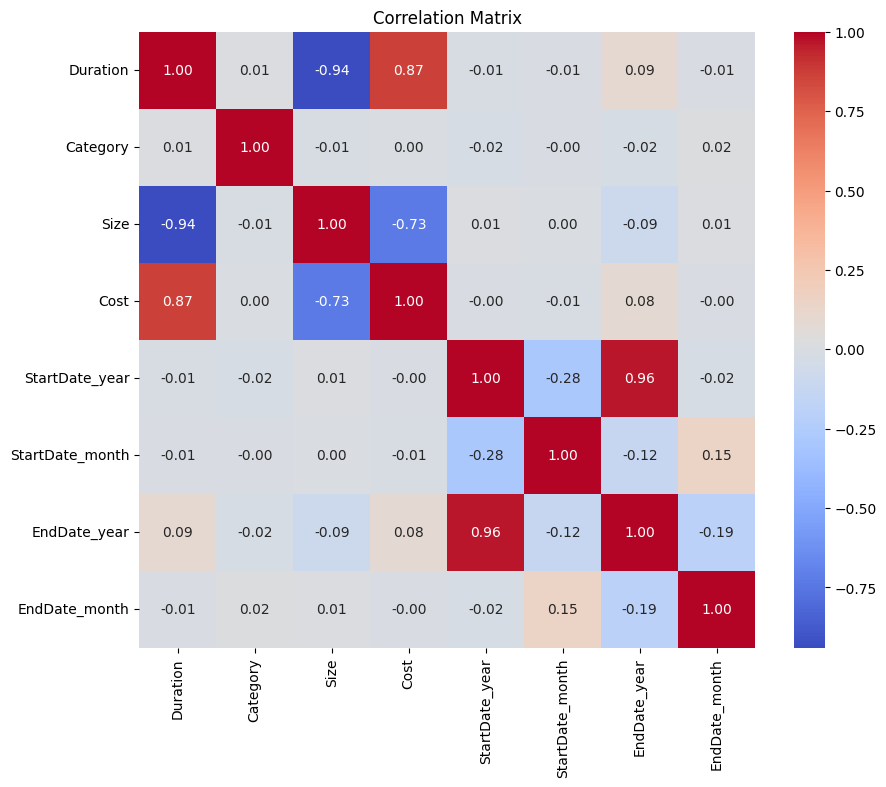

In [ ]:
correlation_matrix = newData.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()